<a href="https://colab.research.google.com/github/mheuristicsApps/An-overview-of-fundamentals-and-applications-of-Particle-Swarm-Optimization/blob/main/QPSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum PSO

<ipython-input-12-1716ff0e83d0>:84: RuntimeWarning: overflow encountered in square
  return np.sum(x**2)
<ipython-input-12-1716ff0e83d0>:44: RuntimeWarning: overflow encountered in multiply
  L=(1/self.best_global_position)*abs(particle.position-c)
<ipython-input-12-1716ff0e83d0>:50: RuntimeWarning: overflow encountered in multiply
  particle.position = c+(rand_sign*L)*np.log(1./u3)


Best position: [ 0.96088858  0.61456951 -0.03117627  0.9546557  -2.02582877 -0.01171907
  1.33130659 -1.74567959  0.71292945 -0.75145439]
Best fitness: 12.210188146021833


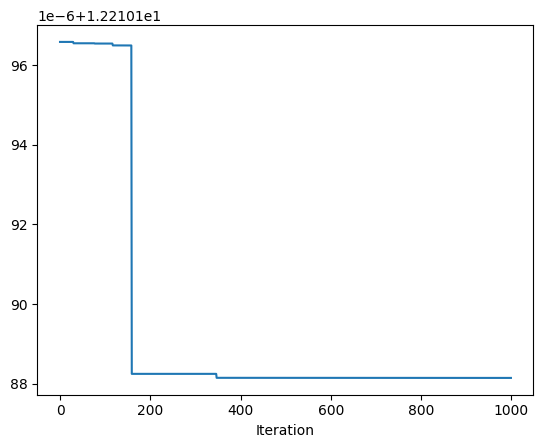

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

class QuantumPSO:
    def __init__(self, objective_function, num_particles=50, max_iterations=1000, c1=1.5, c2=1.5, quantum_factor=0.002):
        self.objective_function = objective_function
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.c1 = c1
        self.c2 = c2
        self.quantum_factor = quantum_factor
        self.best_global_position = None
        self.best_global_fitness = np.inf
        self.particles = []
        self.convergence_curve = []
        
    def optimize(self):
        # Initialize particles
        for i in range(self.num_particles):
            particle = Particle()
            particle.position = np.random.uniform(-5, 5, size=self.objective_function.num_dimensions)
            particle.best_position = particle.position
            particle.fitness = self.objective_function.evaluate(particle.position)
            particle.best_fitness = particle.fitness
            self.particles.append(particle)
            if particle.fitness < self.best_global_fitness:
                self.best_global_fitness = particle.fitness
                self.best_global_position = particle.position
        
        # Main loop
        for iteration in range(self.max_iterations):
            for particle in self.particles:
                # Update velocity
                                
                rand_sign = 1 if random.random() > 0.5 else -1
                
                u1 = np.random.rand()
                u2 = np.random.rand()
                u3 = np.random.rand()
                
                c=(u1*particle.best_position + u2*self.best_global_position)/(u1+u2)
                #print("c",c)
                L=(1/self.best_global_position)*abs(particle.position-c)               
                #print("L      ",L)
                
                

                # Update position
                particle.position = c+(rand_sign*L)*np.log(1./u3)
                
                # Evaluate fitness
                particle.fitness = self.objective_function.evaluate(particle.position)
                
                # Update personal best
                if particle.fitness < particle.best_fitness:
                    particle.best_fitness = particle.fitness
                    particle.best_position = particle.position
                
                # Update global best
                if particle.fitness < self.best_global_fitness:
                    self.best_global_fitness = particle.fitness
                    self.best_global_position = particle.position
            
            # Update convergence curve
            self.convergence_curve.append(self.best_global_fitness)
        
        return self.best_global_position, self.best_global_fitness
    
class Particle:
    def __init__(self):
        self.position = None
        self.velocity = None
        self.best_position = None
        self.fitness = None
        self.best_fitness = np.inf

class ObjectiveFunction:
    def __init__(self, num_dimensions):
        self.num_dimensions = num_dimensions
    
    def evaluate(self, x):
        # TODO: Implement objective function
        return np.sum(x**2)

def main():
    # Define objective function
    objective_function = ObjectiveFunction(num_dimensions=10)
    
    # Define Quantum PSO
    num_particles = 50
    max_iterations = 1000
    c1 = 1.5
    c2 = 1.5
    quantum_factor = 0.5
    quantum_pso = QuantumPSO(objective_function, num_particles, max_iterations, c1, c2, quantum_factor)
    
    # Run optimization
    best_position, best_fitness = quantum_pso.optimize()
    
    # Print results
    print("Best position:", best_position)
    print("Best fitness:", best_fitness)
    
    # Plot convergence curve
    plt.plot(quantum_pso.convergence_curve)
    plt.xlabel("Iteration")
    plt.ylabel

main()
